---

## Universidad de Costa Rica

### Facultad de Ingeniería

### Escuela de Ingeniería Eléctrica

#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---
---

### Tarea 04: Bits generados a partir de una fuente binaria equiprobable

#### *Realizado por:*  **Jean Carlos Alvarado Brenes**

#### **1) (20 %) Crear un esquema de modulación BPSK para los bits presentados. Esto implica asignar una forma de onda sinusoidal normalizada (amplitud unitaria) para cada bit y luego una concatenación de todas estas formas de onda.**

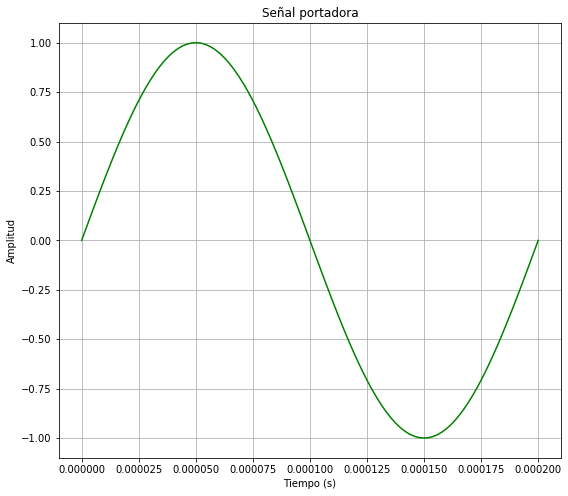

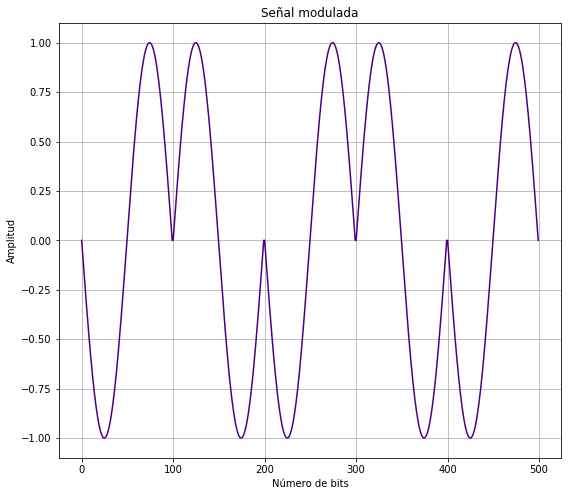

In [16]:
#Se importan las librerías a utilizar
from scipy import stats
from scipy import signal
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Se lee el archivo .csv
import csv
with open ('bits10k.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        lote = list(reader)
# Convertir el archivo csv a una lista        
mylist=[(lote[i][0]) for i in range(9999)]
bits=[float(j) for j in mylist]
bits.insert(0, 0)
# Convertir la lista a un array
bitsarray = np.array(bits)

#Cantidad de bits
N = 10000
#frecuencia de operación
f = 5000 #está en Hz

#Duración del período de cada símbolo (onda)
T=1/f

#Número de puntos de muestreo por período 
p = 100

#Puntos de muestreo para cada período
tp = np.linspace(0, T, p) #desde 0 hasta T, con cantidad p de muestras 

#Creación de la forma de onda sinusoidal normalizada
sinus = np.sin(2*np.pi*f*tp)


#Visualización  de la forma de onda de la portadora
plt.plot(tp, sinus, color = 'green')
# Propiedades de la gráfica
plt.xlabel('Tiempo (s)')
plt.title('Señal portadora')
plt.grid()
plt.ylabel('Amplitud')
plt.rcParams["figure.figsize"] = (9,8)
plt.show()

#Frecuencia de muestreo
fs = p/T

#Creación de la línea temporal para toda la señal Tx
t = np.linspace(0, N*T, N*p)

#Inicializar el vector de la señal
senal = np.zeros(t.shape)

#Creación de la señal modulada
for k,b in enumerate(bitsarray):
    if b == 1:
        senal[k*p:(k+1)*p] = sinus
    else:
        senal[k*p:(k+1)*p] = -sinus
        
#Visualizaciín de los primeros bits modulados
pb= 5
plt.plot(senal[0:pb*p], color = 'indigo')
plt.title('Señal modulada')
plt.xlabel('Número de bits')
plt.grid()
plt.ylabel('Amplitud')
plt.show()

#### **2) (10 %) Calcular la potencia promedio de la señal modulada generada.**

##### Para calcular la potencia promedio se hace lo siguiente:

> Es conocido que la fórmula para calcular la potencia instantánea es la siguiente:

$$
P(T) = \frac{1}{2T}\int_{-T}^{T}x^2(t) ~\mathrm{d}t = A\{x^2(t)\}
$$

> y también que la potencia promedio se calcula de la siguiente manera:

$$
P(T) = \frac{1}{2T}\int_{-T}^{T}E[X^2(t)] ~\mathrm{d}t = A\{E[X^2(t)]\}
$$

> donde $A\{\cdot\}$ es el operador de promedio temporal y $E[X^2(t)]$ es la autocorrelación del proceso aleatorio $X(t)$.

In [17]:
# Librería a utilizar
from scipy import integrate

# Potencia instantánea
# se calcula la potencia instantánea para utilizar este dato 
#en la siguiente fórmula
Pinst = senal**2

# Potencia promedio a partir de la potencia instantánea (W)
Ps = integrate.trapz(Pinst, t) / (N * T)
print('La potencia promedio de la señal modulada generada es =',Ps)

La potencia promedio de la señal modulada generada es = 0.49500049500049487


#### **3) (20 %) Simular un canal ruidoso del tipo AWGN (ruido aditivo blanco gaussiano) con una relación señal a ruido (SNR) desde -2 hasta 3 dB.**

Conociendo que la relación señal-a-ruido es:

$$
SNR_{dB} = 10 \log_{10} \left( \frac{P_s}{P_n} \right)
$$

> donde $P_s$ es la potencia de la señal y $P_n$ es la potencia del ruido ($n$ de *noise*).

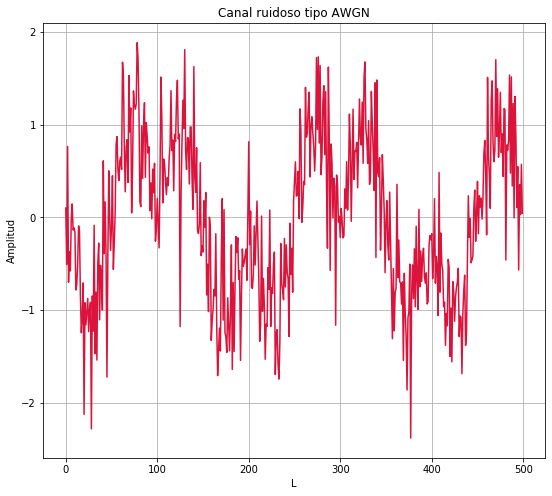

In [19]:
#for n in range (0, 5):
    #SNR = range(-2,3)    
    # Potencia del ruido para SNR y potencia de la señal dadas
    #Pn = Ps / (10**(SNR[n] / 10))
    #plt.plot(Rx[0:pb*p])
    #plt.show()
    
# Relación señal-a-ruido deseada
SNR = 3    

#Potencia del ruido para SNR y potencia de la señal dadas
Pn = Ps / (10**(SNR/ 10))

# Desviación estándar del ruido
sigma = np.sqrt(Pn)

# Crear ruido (Pn = sigma^2)
ruido = np.random.normal(0, sigma, senal.shape)

# Simular "el canal": señal recibida
Rx = senal + ruido

# Se crea el código para la visualización de los primeros bits recibidos
#Visualizaciín de los primeros bits modulados
pb= 5
plt.plot(Rx[0:pb*p], color = 'crimson')
plt.title('Canal ruidoso tipo AWGN')
plt.xlabel('L')
plt.grid()
plt.ylabel('Amplitud')
plt.show()

#### **4) (10 %) Graficar la densidad espectral de potencia de la señal con el método de Welch (SciPy), antes y después del canal ruidoso.**

> Densidad espectral de potencia

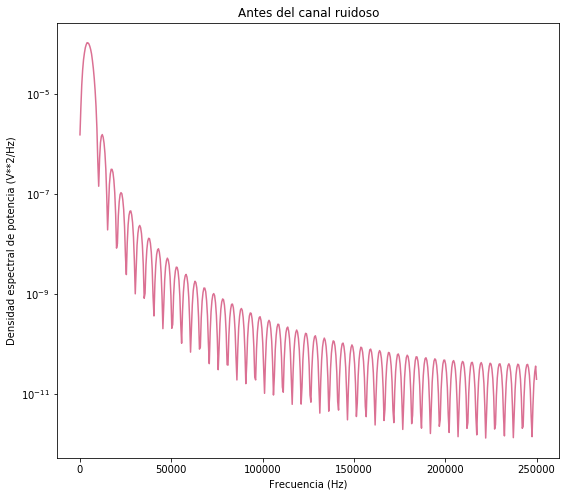

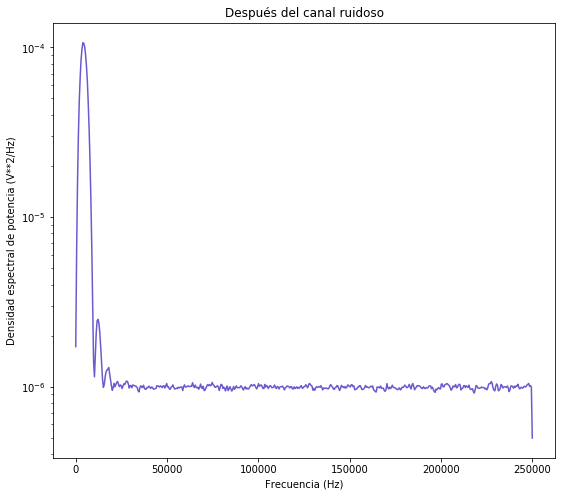

In [36]:
# Se importan las librerías
from scipy import signal

# Antes del canal ruidoso
fw, PSD = signal.welch(senal, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD, color = 'palevioletred')
plt.title('Antes del canal ruidoso')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V**2/Hz)')
plt.show()

# Después del canal ruidoso
# Propiedades de la gráfica
fw, PSD = signal.welch(Rx, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD, color = 'slateblue')
plt.title('Después del canal ruidoso')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V**2/Hz)')
plt.show()

### **5) (20 %) Demodular y decodificar la señal y hacer un conteo de la tasa de error de bits (BER, bit error rate) para cada nivel SNR.**

#### Demodulación y decodificación de la señal

Es útil aquí el conocimiento del **producto interno** de dos señales, utilizado frecuentemente para modulación *coherente* (donde la fase, es decir, la sincronización, es perfecta). Se denota como:

$$
\langle g(t), h(t) \rangle = \int_0^T g(t) h(t) ~\mathrm{d}t
$$

* $\langle g(t), g(t) \rangle = E_g$, la energía de la señal en el intervalo de integración.
* $\langle g(t), h(t) \rangle = 0$ cuando $g(t)$ y $h(t)$ son ortogonales.

In [37]:
# Pseudo-energía de la onda original (esta es suma, no integral)
Es = np.sum(sinus**2)

print('Bits originales =',bitsarray)
# Inicialización del vector de bits recibidos
bitsRx = np.zeros(bitsarray.shape)

# Decodificación de la señal por detección de energía
for k, b in enumerate(bitsarray):
    Ep = np.sum(Rx[k*p:(k+1)*p] * sinus)
    if Ep > Es/2:
        bitsRx[k] = 1
    else:
        bitsRx[k] = 0
print('Bits decodificados =',bitsRx)
err = np.sum(np.abs(bitsarray - bitsRx))
BER = err/N

print('Hay un total de {} errores en {} bits para una tasa de error de {}.'.format(err, N, BER))

Bits originales = [0. 1. 0. ... 0. 1. 1.]
Bits decodificados = [0. 1. 0. ... 0. 1. 1.]
Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.


### **6) (20 %) Graficar BER versus SNR.**

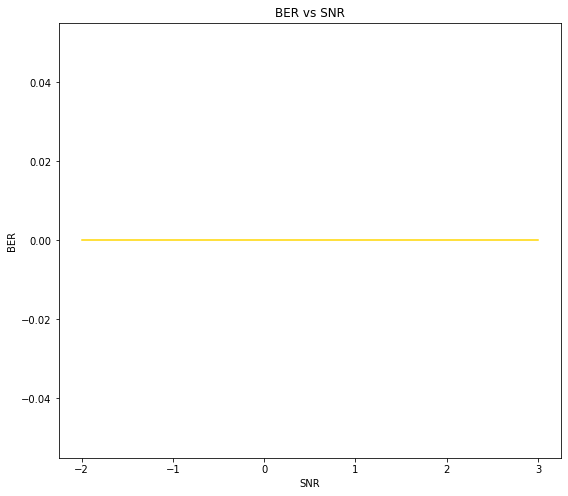

In [38]:
# generar array de SN, con los dB dados 
arraySNR = [-2, -1, 0, 1, 2, 3] #en dB 

#generar array de ceros porque el error es 0
BERarray= [0,0,0,0,0,0]

#generar gráfica
#configuración de gráfica
plt.plot(arraySNR, BERarray, color = 'gold')
plt.xlabel('SNR')
plt.ylabel('BER')
plt.title('BER vs SNR')
plt.show()